# Content and Objectives

- Basic simulation showing how to get BER curves
- BPSK is sent; ML detection (nearest neighbor) is applied as decision criterion

# Importing

In [1]:
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import matplotlib

# showing figures inline
%matplotlib inline

In [20]:
# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=matplotlib.checkdep_usetex(True))

matplotlib.rc('figure', figsize=(14, 6) )

# Parameters

In [7]:
# max. numbers of errors and/or symbols
# used as loop condition for the simulation
max_errors = 1e3
max_syms = 1e5

# Es/N0
EsN0_db_min = 0
EsN0_db_max = 12
EsN0_db_step = 2

# initialize Eb/N0 array
EsN0_db_range = np.arange( EsN0_db_min, EsN0_db_max, EsN0_db_step )
EsN0_range = 10**( EsN0_db_range / 10 )

# constellation points
mod_points_bpsk = [-1, 1]     

# Simulation

In [8]:
# initialize BER array 
# NOTE: dtype is required since zeros_like(arg) is of same type as arg
ber_bpsk = np.zeros_like( EsN0_db_range, dtype=float)

# theoretical ber for bpsk as on slides
# NOTE: using sigma^2 = N0 / 2 which will be justified later
# NOTE: Q(x) = 1 - Phi( x )
ber_bpsk_theo = 1 - stats.norm.cdf( np.sqrt( 2 * EsN0_range ) ) 
    
# loop for snr
for ind_snr, val_snr in enumerate( EsN0_range ):

    # initialize error counter
    num_errors_bpsk = 0
    num_syms = 0

    # get noise variance
    sigma2 = 1. / ( val_snr )  

    # loop for errors
    while ( num_errors_bpsk < max_errors and num_syms < max_syms ):

        # generate data and modulate by look-up
        d = np.random.randint( 0, 2)
        s_bpsk = mod_points_bpsk[ d ] 
        
        # add noise
        noise = np.sqrt( sigma2 / 2 ) * ( np.random.randn() + 1j * np.random.randn() )
        r_bpsk = s_bpsk + noise            

        # demod by comparing real part with 0
        d_est_bpsk = int( np.real( r_bpsk ) > 0 )

        # count errors
        num_errors_bpsk += int( d_est_bpsk != d )

        # increase symbol counter
        num_syms += 1


    # ber as relative amount of errors
    ber_bpsk[ ind_snr ] = num_errors_bpsk / num_syms

    print('Es/N0 planned (dB) = {:2.1f}\n'.format( 10*np.log10(val_snr) ) )

Es/N0 planned (dB) = 0.0

Es/N0 planned (dB) = 2.0

Es/N0 planned (dB) = 4.0

Es/N0 planned (dB) = 6.0

Es/N0 planned (dB) = 8.0

Es/N0 planned (dB) = 10.0



# Plotting

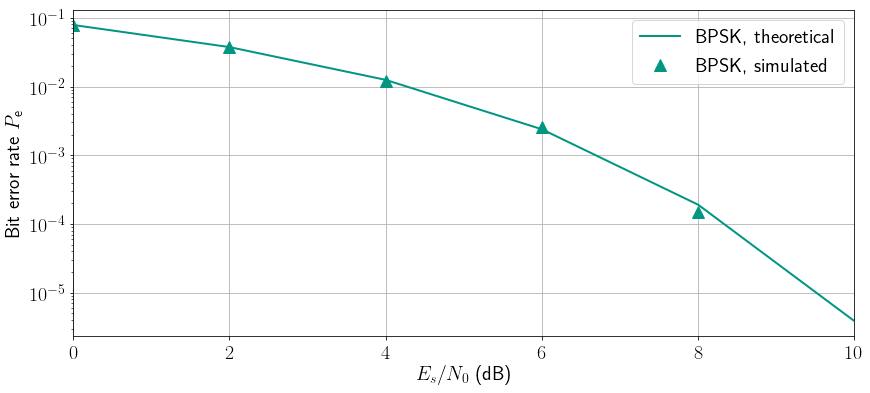

In [22]:
# plot theoretical values
ax_bpsk = plt.plot( EsN0_db_range, ber_bpsk_theo, c=(0,0.59,0.51), linewidth=2.0, label = "BPSK, theoretical")

plt.plot( EsN0_db_range, ber_bpsk, '^', c=(0,0.59,0.51), linewidth=2.0, markersize = 12, label = "BPSK, simulated" )

plt.yscale('log')
plt.gca().autoscale(enable=True, axis='x', tight=True)

plt.grid(True)
plt.legend(loc='upper right') 

plt.xlabel('$E_s/N_0$ (dB)')
plt.ylabel('Bit error rate $P_{\mathsf{e}}$')
plt.savefig('Jupyter_ber_bpsk.pdf',bbox_inches='tight')